In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('./data/after_preprocess.csv')
df.head()

,team,opponent,venue,date,time,round,day,result,gf,ga,...,aerial duels won,aerial duels lost,season,b365h,b365d,b365a,over2.5,under2.5,points,points_before_match
0,1,19,1,2024-08-25,16,2,6,3,2.0,0.0,...,6.0,8.0,2024-2025,1.27,5.75,11.0,1.36,3.20,6,3
1,1,22,1,2024-09-14,15,4,5,0,0.0,1.0,...,21.0,12.0,2024-2025,1.22,6.50,12.0,1.44,2.75,9,9
2,1,16,1,2024-09-21,15,5,5,3,3.0,0.0,...,9.0,6.0,2024-2025,1.30,6.25,9.0,1.36,3.20,12,9
3,1,5,1,2024-10-20,16,8,6,3,2.0,1.0,...,6.0,10.0,2024-2025,1.62,4.10,5.0,1.40,3.00,21,18
4,1,7,1,2024-11-02,15,10,5,3,2.0,1.0,...,10.0,8.0,2024-2025,1.40,5.00,7.5,1.40,3.00,25,22


In [53]:
df['month'] = pd.to_datetime(df['date']).dt.month
cols = ['date', 'month'] + [col for col in df if col not in ['date', 'month']]
df = df[cols]
df.head()

,date,month,team,opponent,venue,time,round,day,result,gf,...,aerial duels won,aerial duels lost,season,b365h,b365d,b365a,over2.5,under2.5,points,points_before_match
0,2024-08-25,8,1,19,1,16,2,6,3,2.0,...,6.0,8.0,2024-2025,1.27,5.75,11.0,1.36,3.20,6,3
1,2024-09-14,9,1,22,1,15,4,5,0,0.0,...,21.0,12.0,2024-2025,1.22,6.50,12.0,1.44,2.75,9,9
2,2024-09-21,9,1,16,1,15,5,5,3,3.0,...,9.0,6.0,2024-2025,1.30,6.25,9.0,1.36,3.20,12,9
3,2024-10-20,10,1,5,1,16,8,6,3,2.0,...,6.0,10.0,2024-2025,1.62,4.10,5.0,1.40,3.00,21,18
4,2024-11-02,11,1,7,1,15,10,5,3,2.0,...,10.0,8.0,2024-2025,1.40,5.00,7.5,1.40,3.00,25,22


In [56]:
column_not_need_form = ['team', 'opponent', 'venue', 'attendance', 'formation', 'oop formation', 'referee', 'captain', 'points',
                    'points_before_match', 'season', 'round', 'date', 'day', 'time', 'month', 'b365h', 'b365d', 'b365a', 'over2.5', 'under2.5']

In [57]:
# create form_feature for each feature not in column_not_need_form from the previous 5 games
def get_form(team, date):
    team_games = df[(df['team'] == team) & (df['date'] <= date)].sort_values(by='date', ascending=False)
    features = [col for col in team_games.columns if col not in column_not_need_form]
    cur_game_index = len(team_games) 
    form_stats = {}
    if cur_game_index == 1:
        team_games = team_games.iloc[0]

    elif 1 < cur_game_index < 6:
        team_games = team_games.iloc[1:]

    else:
        team_games = team_games.iloc[1:6]

    for feature in features:
        form_stats[feature + '_form'] = team_games[feature].mean()
    return form_stats

# get_form(2, '2017-08-11')
    
def add_form_features(df):
    form_features = []
    for i, row in df.iterrows():
        print(i)
        form_features.append(get_form(row['team'], row['date']))
    form_features = pd.DataFrame(form_features)
    df = df.reset_index(drop=True)
    return pd.concat([df, form_features], axis=1)

In [ ]:
add_form_features(df)

In [ ]:
df.to_csv('./data/after_getform.csv')

In [67]:
data = pd.read_csv('./data/after_getform.csv')
data.head()

,Unnamed: 0,date,month,team,opponent,venue,time,round,day,result,...,performance off_form,performance crs_form,performance int_form,performance tklw_form,performance pkwon_form,performance pkcon_form,performance og_form,performance recov_form,aerial duels won_form,aerial duels lost_form
0,0,2024-08-25,8,1,19,1,16,2,6,3,...,4.0,22.8,7.4,11.8,0.0,0.0,0.0,48.4,13.2,9.6
1,1,2024-09-14,9,1,22,1,15,4,5,0,...,2.4,16.8,7.4,11.4,0.0,0.0,0.0,48.0,11.2,7.4
2,2,2024-09-21,9,1,16,1,15,5,5,3,...,1.2,17.6,8.2,10.4,0.0,0.0,0.0,48.0,14.4,8.0
3,3,2024-10-20,10,1,5,1,16,8,6,3,...,0.8,14.0,9.4,10.8,0.2,0.0,0.0,46.4,16.0,8.0
4,4,2024-11-02,11,1,7,1,15,10,5,3,...,1.6,14.6,7.4,11.2,0.4,0.0,0.0,40.6,12.6,10.2


In [68]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [70]:
important_col = ['gf', 'ga', 'result']
data.drop(columns=[col for col in data.columns if 'form' not in col and col not in column_not_need_form and col not in important_col], inplace=True)
data.head()

,date,month,team,opponent,venue,time,round,day,result,gf,...,performance off_form,performance crs_form,performance int_form,performance tklw_form,performance pkwon_form,performance pkcon_form,performance og_form,performance recov_form,aerial duels won_form,aerial duels lost_form
0,2024-08-25,8,1,19,1,16,2,6,3,2.0,...,4.0,22.8,7.4,11.8,0.0,0.0,0.0,48.4,13.2,9.6
1,2024-09-14,9,1,22,1,15,4,5,0,0.0,...,2.4,16.8,7.4,11.4,0.0,0.0,0.0,48.0,11.2,7.4
2,2024-09-21,9,1,16,1,15,5,5,3,3.0,...,1.2,17.6,8.2,10.4,0.0,0.0,0.0,48.0,14.4,8.0
3,2024-10-20,10,1,5,1,16,8,6,3,2.0,...,0.8,14.0,9.4,10.8,0.2,0.0,0.0,46.4,16.0,8.0
4,2024-11-02,11,1,7,1,15,10,5,3,2.0,...,1.6,14.6,7.4,11.2,0.4,0.0,0.0,40.6,12.6,10.2


In [71]:
data['season'] = data['season'].apply(lambda x: x.split('-')[0])
data['season'] = data['season'].astype(int)
data['season'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017])

In [72]:
data.columns

Index(['date', 'month', 'team', 'opponent', 'venue', 'time', 'round', 'day',
       'result', 'gf',
       ...
       'performance off_form', 'performance crs_form', 'performance int_form',
       'performance tklw_form', 'performance pkwon_form',
       'performance pkcon_form', 'performance og_form',
       'performance recov_form', 'aerial duels won_form',
       'aerial duels lost_form'],
      dtype='object', length=156)

In [73]:
# from sklearn.multioutput import MultiOutputRegressor
# from sklearn.ensemble import RandomForestRegressor

# rf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [74]:
train_set = data[data['date'] < '2022-01-01']
test_set = data[data['date'] >= '2022-01-01']

In [76]:
predictors = [col for col in data.columns if col not in ['gf', 'ga', 'date', 'result', 'points']]
rf.fit(train_set[predictors], train_set['result']) 

RandomForestClassifier(random_state=42)

In [77]:
preds = rf.predict(test_set[predictors])

In [79]:
# from sklearn.metrics import mean_squared_error

# mse = mean_squared_error(test_set[['gf', 'ga']], preds)
# mse
from sklearn.metrics import accuracy_score

acc = accuracy_score(test_set['result'], preds)
acc

0.5421002838221382

In [90]:
match = test_set.iloc[51]
match['result']

3

In [91]:
rf.predict([match[predictors]])

c:\Users\admin\anaconda3\envs\ai_learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

                    Feature  Importance
2                  opponent    0.027823
18          performance crs    0.021575
27                    b365d    0.017928
8                   captain    0.014496
29                  over2.5    0.012296
..                      ...         ...
23           performance og    0.001682
147     performance og_form    0.001174
98       gca types def_form    0.000943
138  performance 2crdy_form    0.000856
14        performance 2crdy    0.000412

[151 rows x 2 columns]


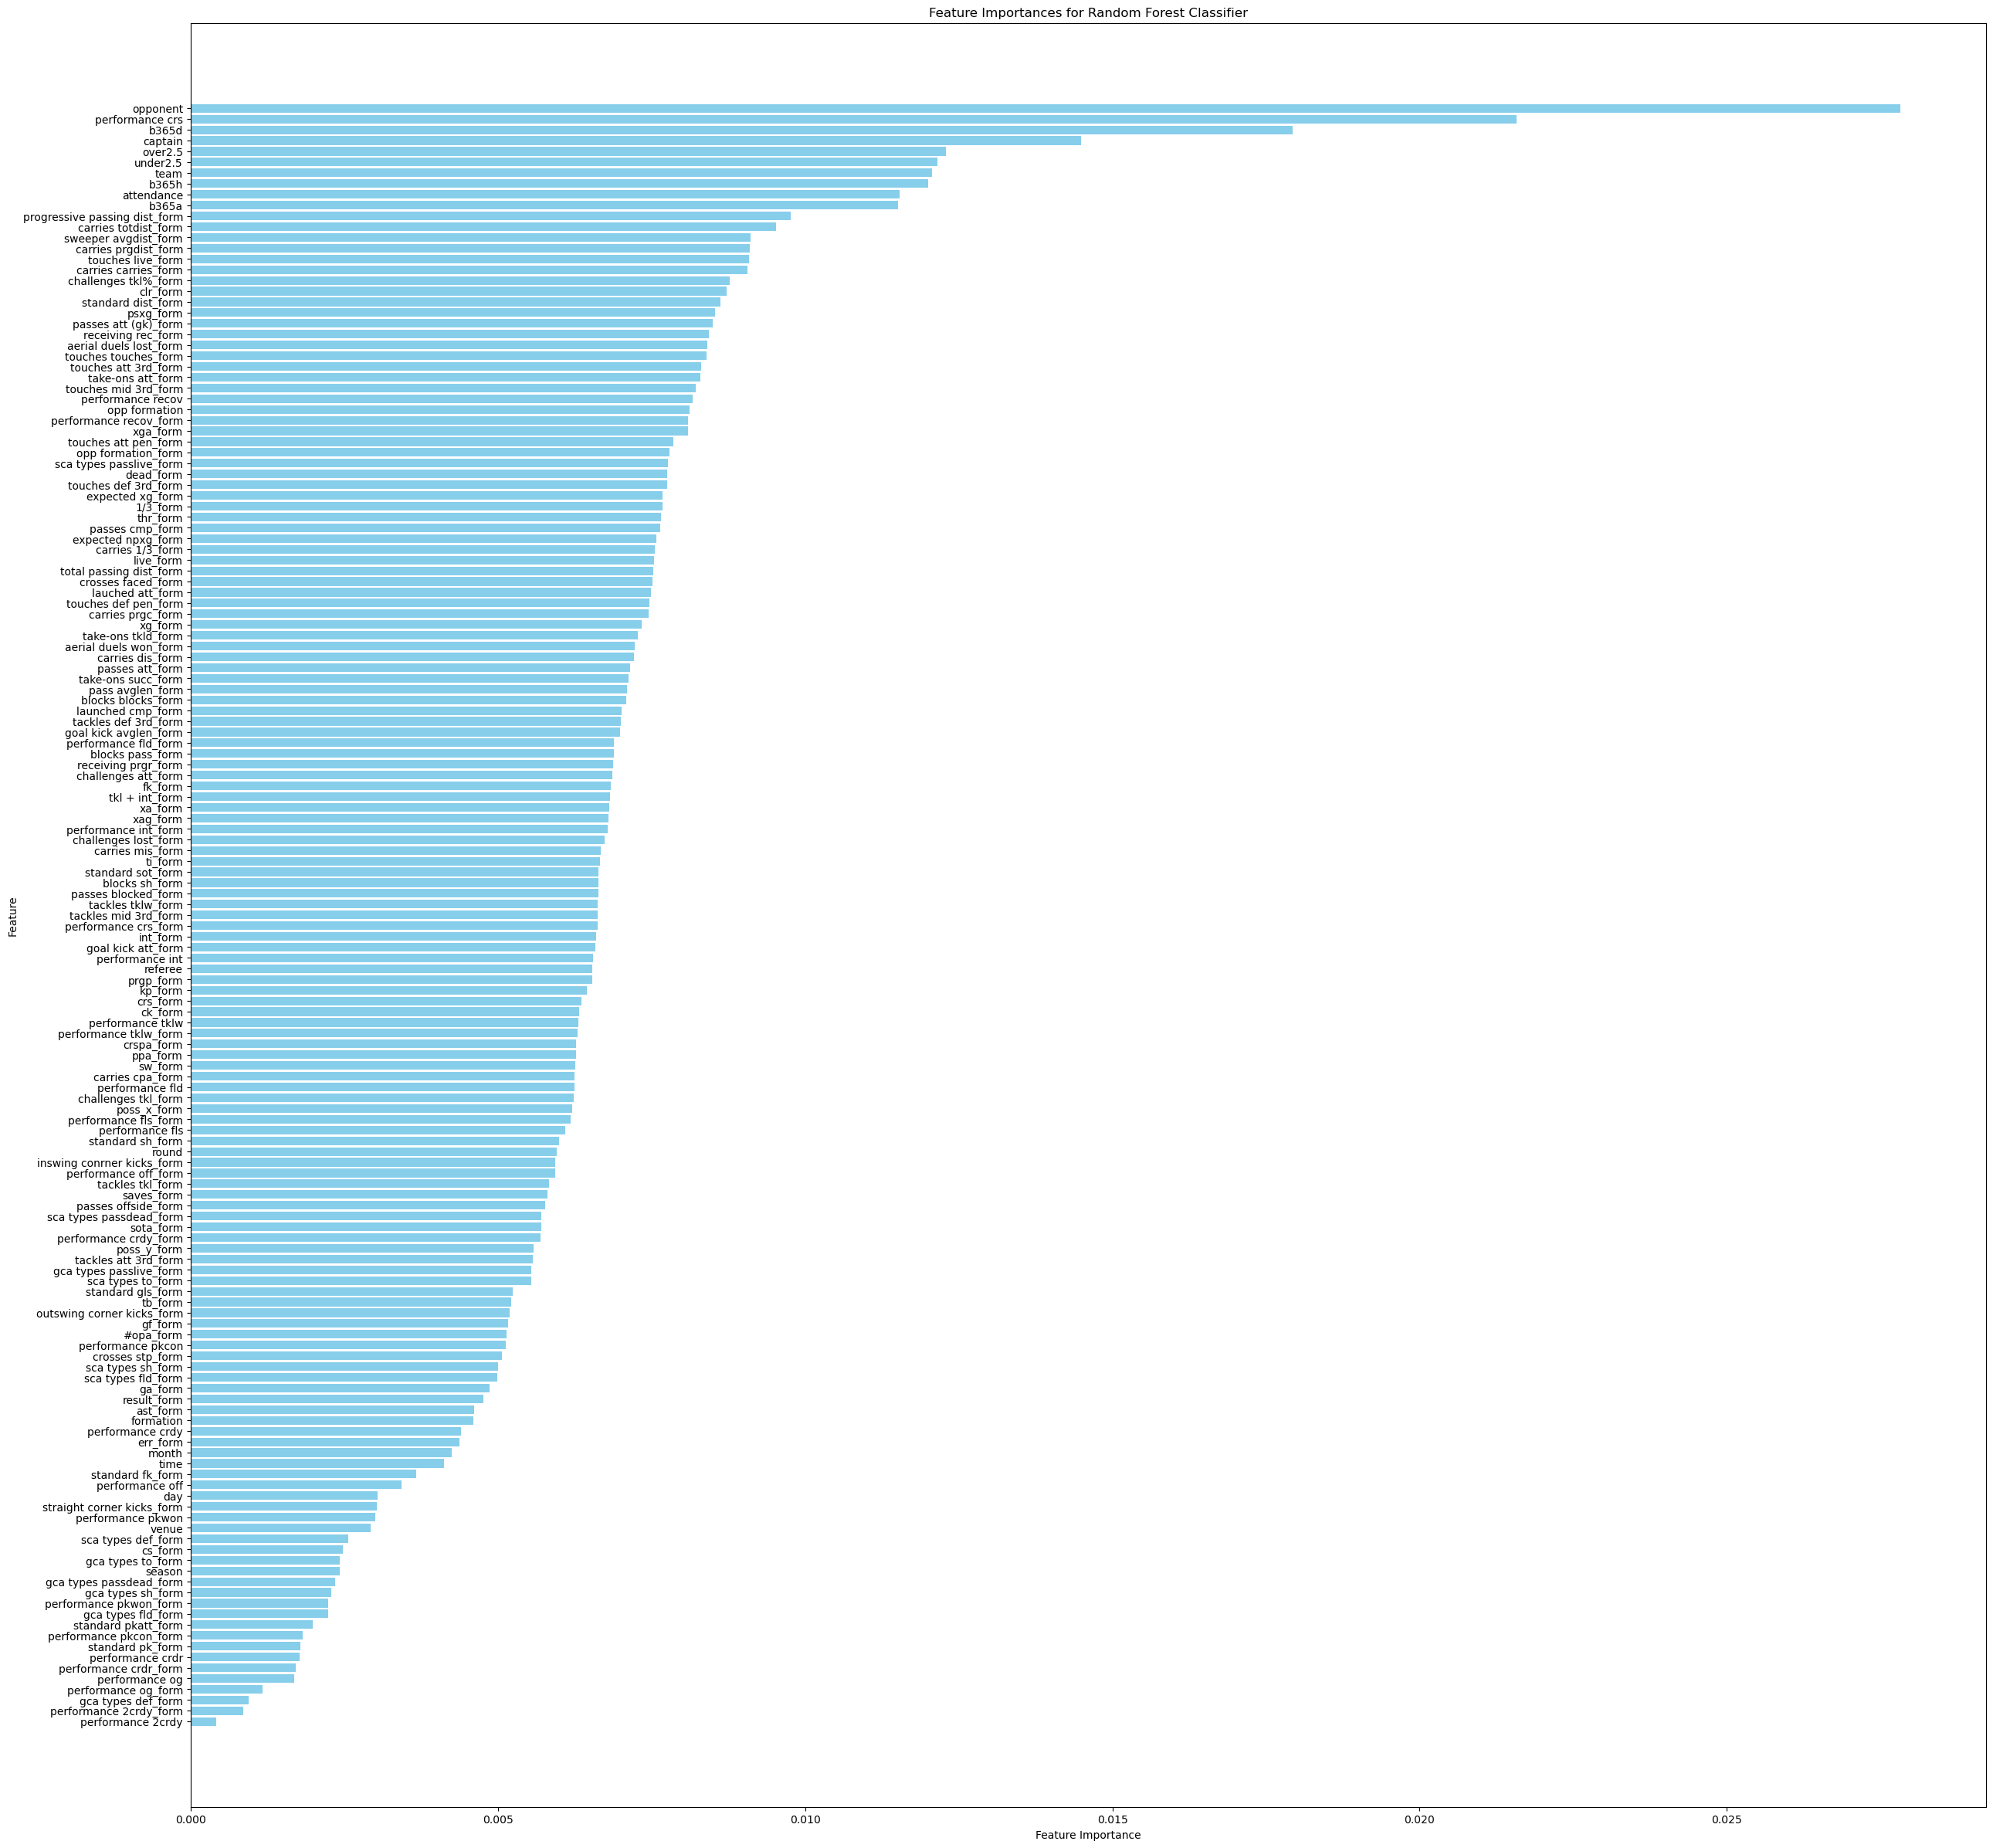

In [95]:
feature_importances = rf.feature_importances_

# Tạo DataFrame để sắp xếp và hiển thị
importance_df = pd.DataFrame({
    'Feature': predictors,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Trực quan hóa tầm quan trọng bằng biểu đồ
plt.figure(figsize=(30, 30))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

In [48]:
gf_importances = rf.estimators_[0].feature_importances_  
ga_importances = rf.estimators_[1].feature_importances_  

avg_importances = np.mean([gf_importances, ga_importances], axis=0)

feature_importance_df = pd.DataFrame({
    'Feature': predictors,
    'GF_Importance': gf_importances,
    'GA_Importance': ga_importances,
    'Avg_Importance': avg_importances
}).sort_values(by='Avg_Importance', ascending=False)

print(feature_importance_df)

                    Feature  GF_Importance  GA_Importance  Avg_Importance
2                  opponent       0.034142       0.100591        0.067367
8                   captain       0.104299       0.013330        0.058815
27                    b365d       0.036944       0.040550        0.038747
18          performance crs       0.044131       0.018284        0.031208
22        performance pkcon       0.000854       0.043358        0.022106
..                      ...            ...            ...             ...
146     performance og_form       0.001334       0.000556        0.000945
136   performance crdr_form       0.001122       0.000765        0.000944
97       gca types def_form       0.000697       0.000631        0.000664
137  performance 2crdy_form       0.000517       0.000639        0.000578
14        performance 2crdy       0.000078       0.000805        0.000441

[150 rows x 4 columns]


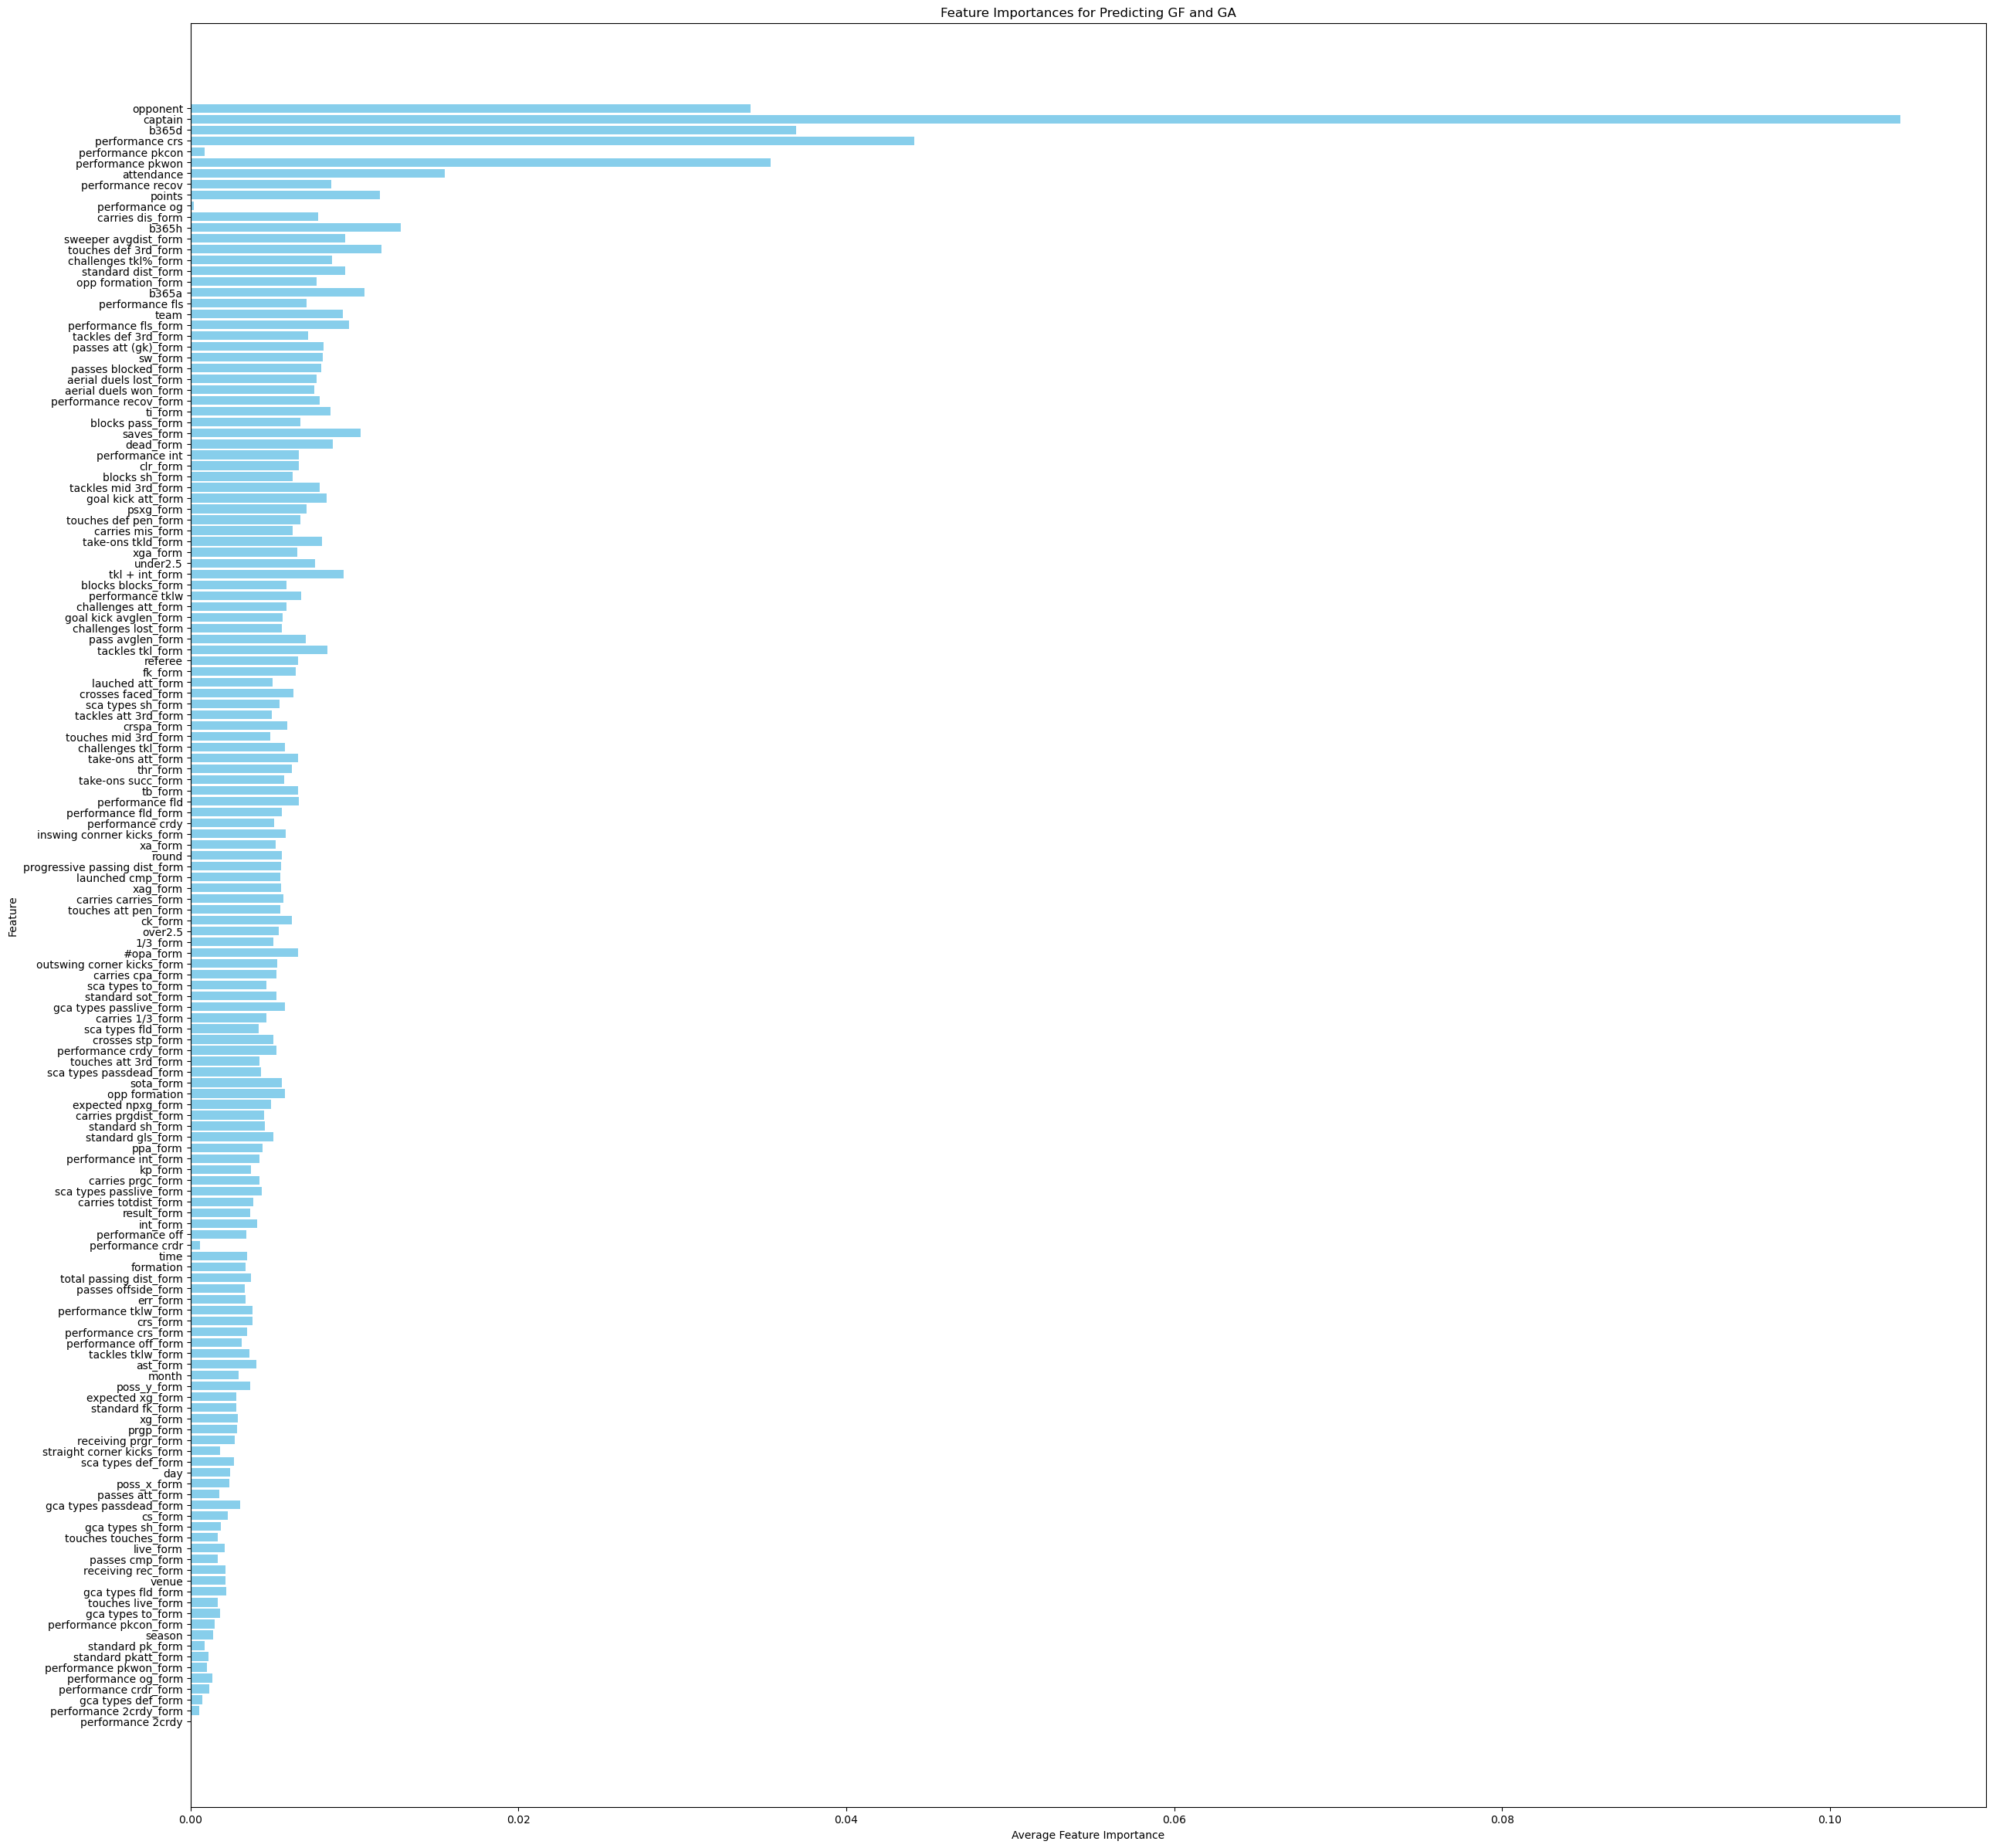

In [49]:
plt.figure(figsize=(30, 30))
plt.barh(feature_importance_df['Feature'], feature_importance_df['GF_Importance'], color='skyblue')
plt.xlabel('Average Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Predicting GF and GA')
plt.gca().invert_yaxis()
plt.show()

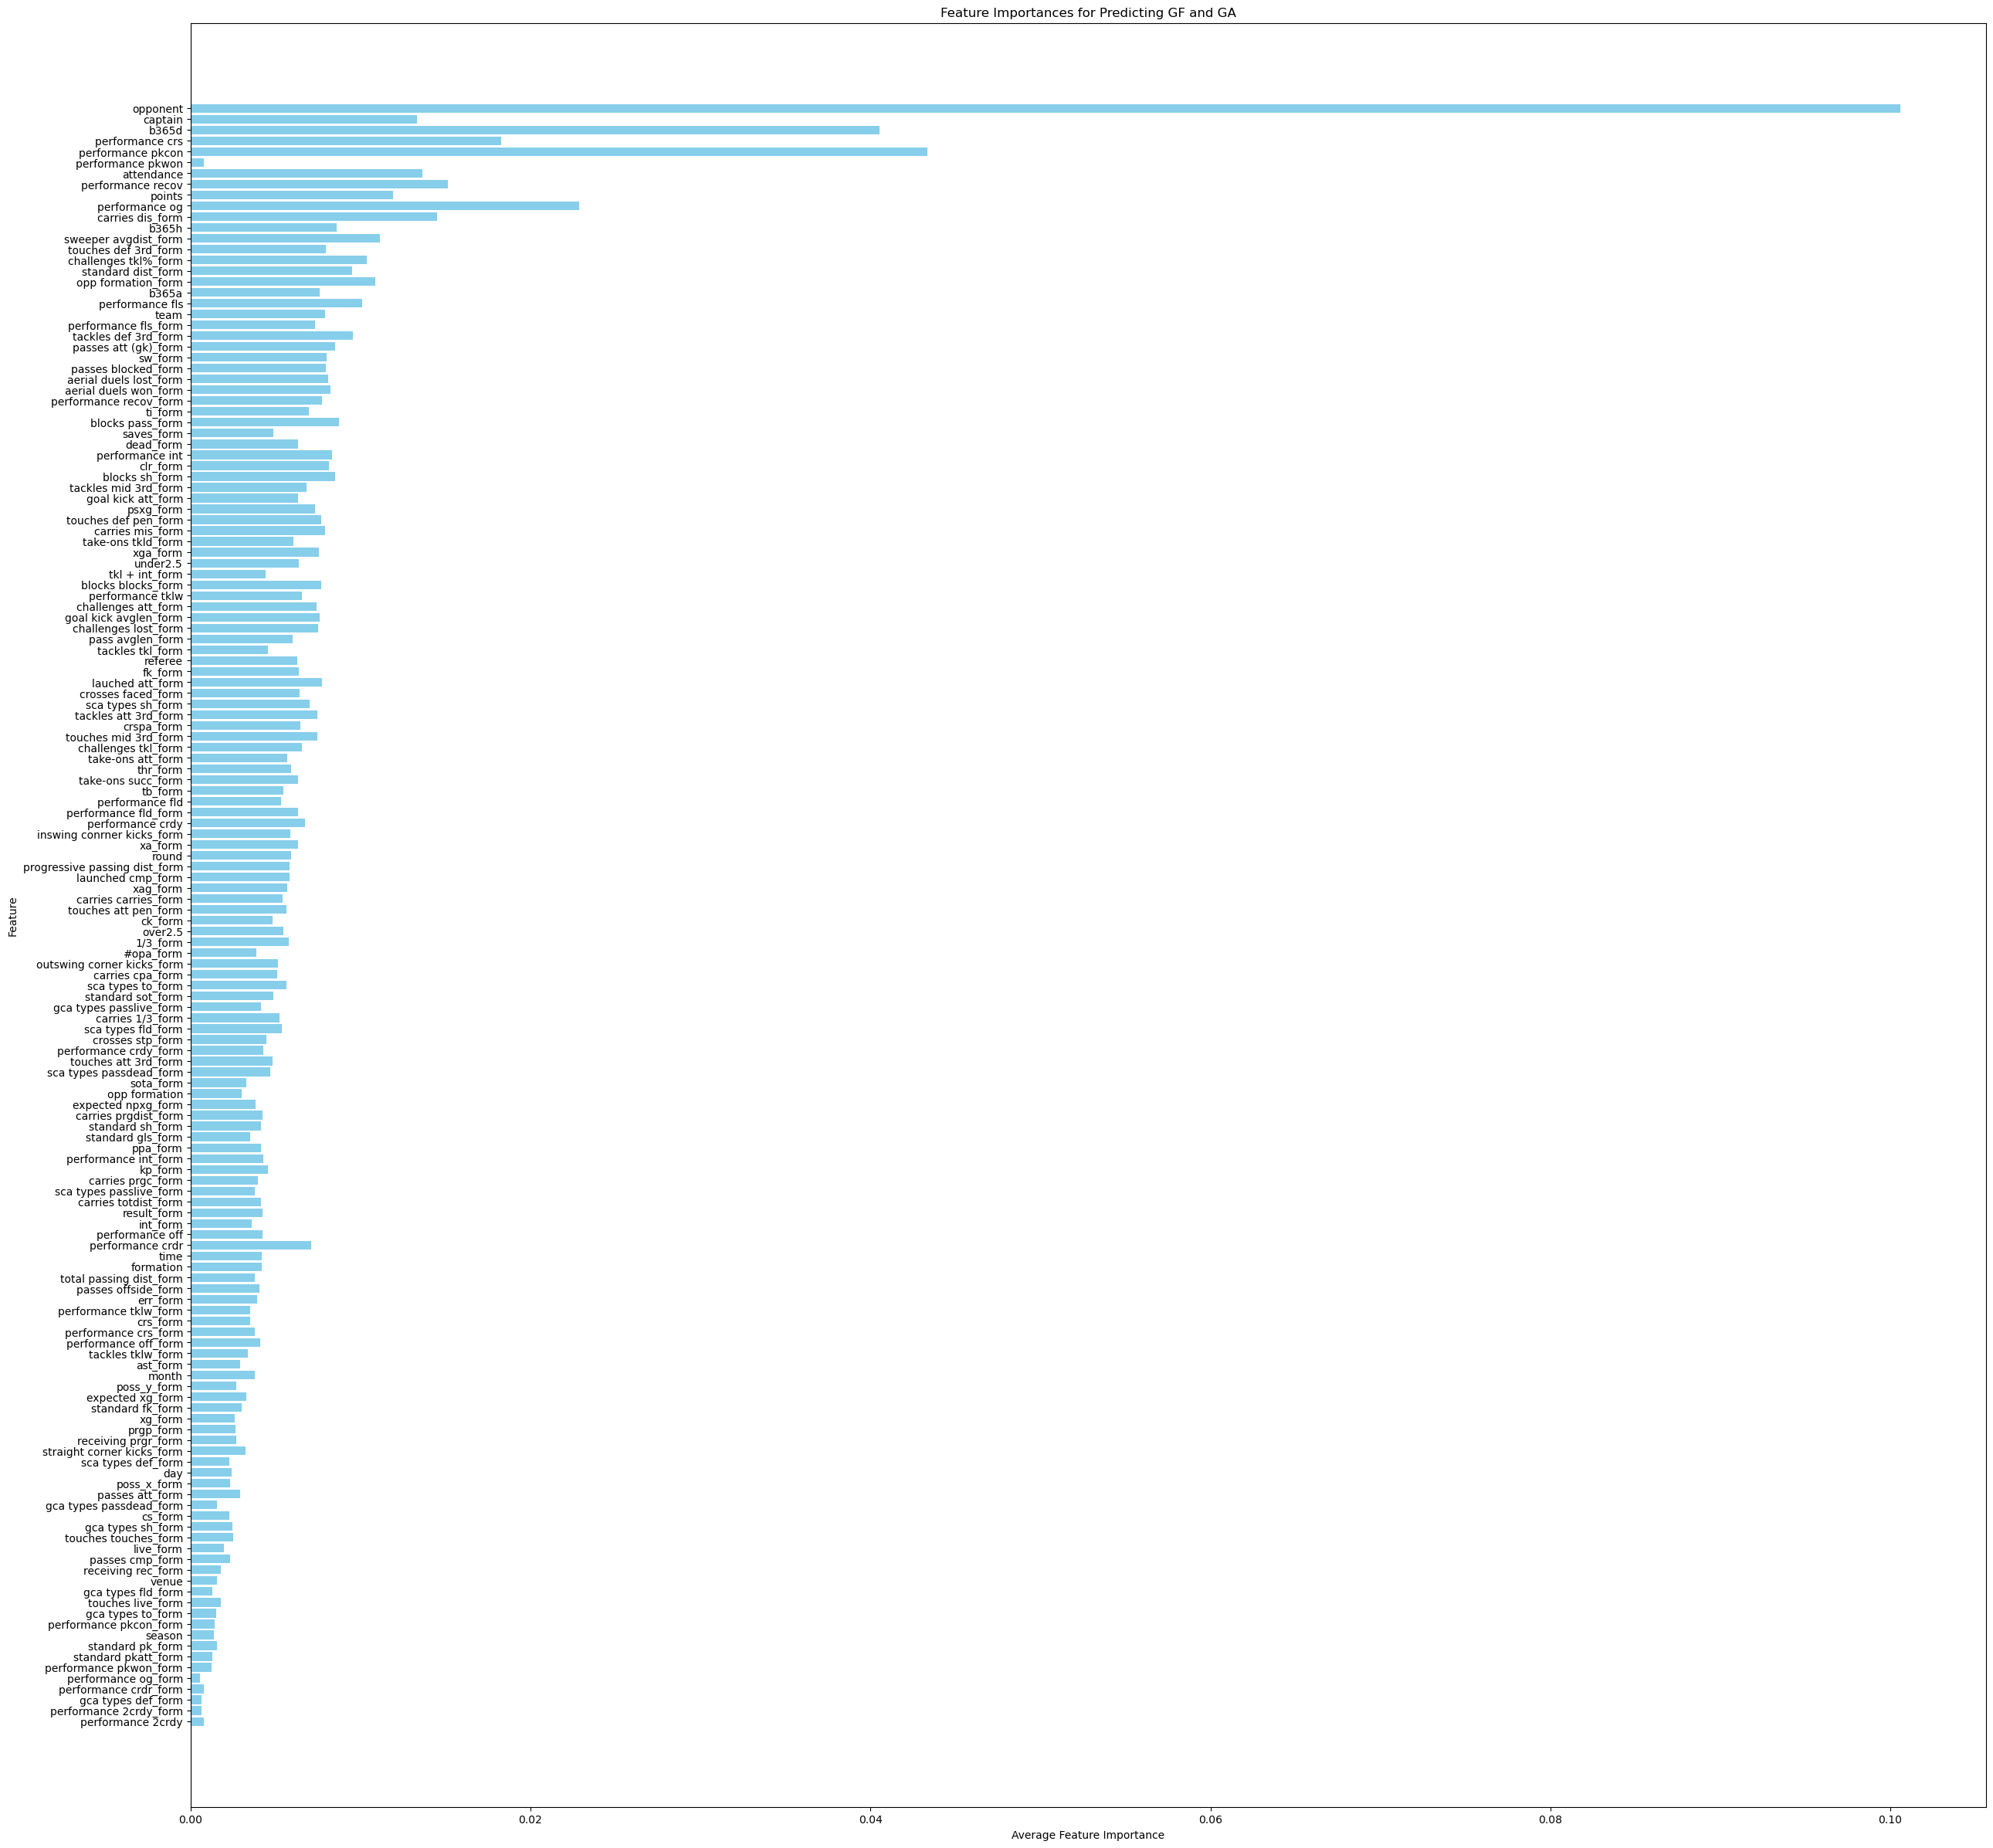

In [47]:
# Vẽ biểu đồ
plt.figure(figsize=(30, 30))
plt.barh(feature_importance_df['Feature'], feature_importance_df['GA_Importance'], color='skyblue')
plt.xlabel('Average Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Predicting GF and GA')
plt.gca().invert_yaxis()
plt.show()